# Advanced Numpy

In [ ]:
import numpy as np

## Python List VS Numpy Array.
  1. Speed


In [ ]:
import time

In [ ]:
# Time taken by the python list:

lst1 = [i for i in range(23456789)]
lst2 = [i for i in range(23456789)]

sum_lst = []
start = time.time()  # time start from here

for i in range(len(lst1)):
  sum_lst.append(lst1[i] + lst2[i])  # Creating new lst from adding lst1 and lst2 elements.

res1 = time.time()-start  # current time - starting time -> how much time is taken by the above for loop
print(res1)

7.493910312652588


In [ ]:
# Time taken by the numpy array:

arr1 = np.arange(23456789)
arr2 = np.arange(23456789)

start = time.time()
sum_arr = arr1 + arr2
res2 = time.time()-start
print(res2)

0.0889592170715332


This indicates that numpy array is much faster than python list.    
-> Rough figure given below.

In [ ]:
final = res1/res2
print(final)

84.23984112435075


  2. Memory

In [ ]:
import sys

In [ ]:
lst = [i for i in range(23456789)]
lst_size = sys.getsizeof(lst) # This function will return the size of lst variable.
print(lst_size)

203199480


lst occupies `203199480` bytes of memory.

In [ ]:
arr = np.arange(23456789)
arr_size = sys.getsizeof(arr) # return the size of numpy array i.e. arr
print(arr_size)

187654424


In numpy array we have the customization of dtype.

In [ ]:
arr = np.arange(23456789,dtype = np.int32) # int32
arr_size = sys.getsizeof(arr)
print(arr_size)

arr = np.arange(23456789,dtype = np.int16) # int16
arr_size1 = sys.getsizeof(arr)
print(arr_size1)

arr = np.arange(23456789,dtype = np.int8) # int8
arr_size2 = sys.getsizeof(arr)
print(arr_size2)

93827268
46913690
23456901


This indicates that numpy array uses less memory than python list.

## Normal Slicing in numpy Array.

In [ ]:
# 1D Array:
arr1 = np.array([1,2,3,4,5,6,7,8,9,10])
print(arr1)
print(arr1[3:9])
print(arr1[-2::-1])
print(arr1[::-2])

[ 1  2  3  4  5  6  7  8  9 10]
[4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
[10  8  6  4  2]


In [ ]:
# 2D Array:
arr2 = np.arange(12).reshape(4,3)
print(arr2)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [ ]:
print(arr2[1:3,1:3])

[[4 5]
 [7 8]]


## Advanced Indexing.
  1. Fancy Indexing

In [ ]:
arr2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
arr2[[0,1,2]] # This will fetch the rows whoes index values are 0,1,2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
arr2[:,[1,2]] # This will fetch all the rows but those columns whose index value are 1,2

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

2. Boolean Indexing.

In [ ]:
arr = np.arange(24).reshape(6,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
# If we compare any fixed value with an array then it will return an boolean array.
arr > 10

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
# If we pass this boolean array to the original array, then it is called as masking.
arr[arr > 10] # arr values greater than 10

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [ ]:
# arr values less than 20
arr[arr<20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
# All even values in arr
arr[arr % 2 == 0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [ ]:
# The values which are greater than 15 and odd in arr
arr[(arr > 10) & (arr % 2 != 0)]

array([11, 13, 15, 17, 19, 21, 23])

In [ ]:
# The values which are divisible by 4
arr[arr % 4 == 0]

array([ 0,  4,  8, 12, 16, 20])

# Broadcasting.
Broadcasting allows NumPy to perform element-wise operations on arrays of different shapes by stretching the smaller array to match the shape of the larger one.



 - The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

 - The smaller array is “broadcast” across the larger array so that they have
compatible shapes.



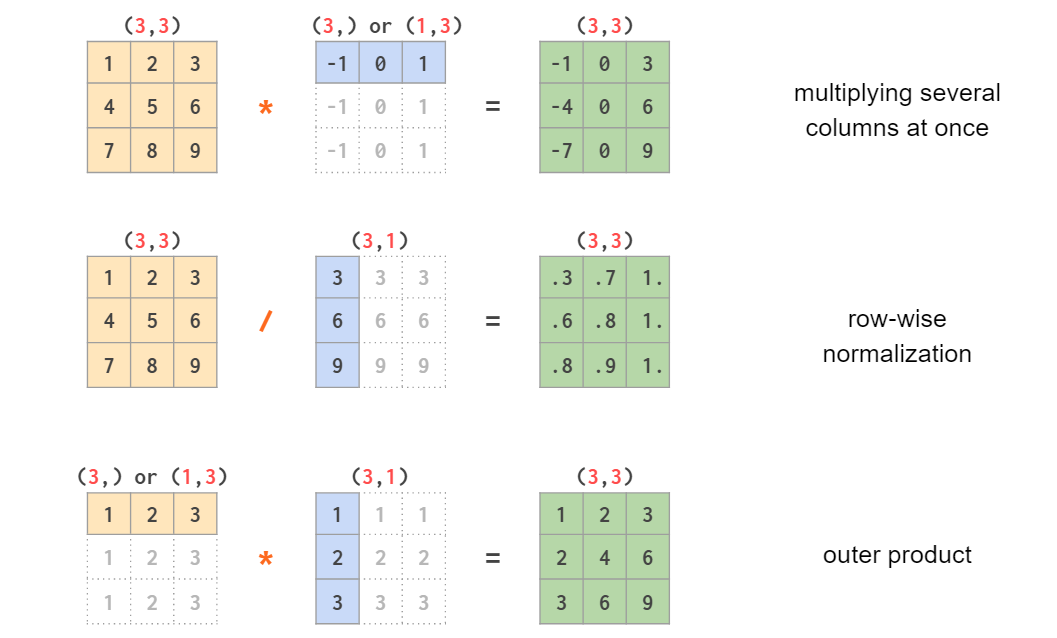

## Broadcasting Rules:

1. Shape Comparison: NumPy compares the shapes of the arrays element by element, starting from the last dimension.

2. Equal or 1: Two dimensions are compatible if they are equal or if one of them is 1.

3. Extend with 1: If the arrays have different numbers of dimensions, NumPy prepends 1s to the shape of the smaller array until both shapes have the same length.

4. Dimension Matching: For each dimension, if one of the arrays has size 1, it will be "stretched" to match the other array's size.

In [ ]:
# When the shape is same,
arr1 = np.arange(12).reshape(3,4)
arr2 = np.arange(12).reshape(3,4)

res1 = arr1 + arr2 # This will add the consecutive elements of both the arrays.
res1

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [ ]:
# If the shapes are different,
arr1 = np.arange(12).reshape(4,3)
arr2 = np.arange(3)

res2 = arr1 + arr2 # Here Numpy is performing broadcasting between these arrays.
res2

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

### Examples:

In [ ]:
arr1 = np.arange(3).reshape(1,3)
arr2 = np.arange(3).reshape(3,1)

res = arr1 + arr2 # Here Numpy is performing broadcasting between these arrays.
res1

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [ ]:
arr1 = np.arange(4).reshape(1,4)
arr2 = np.arange(3).reshape(3,1)

res = arr1 + arr2 # Here Numpy is performing broadcasting between these arrays.
res1

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [ ]:
arr1 = np.array([1,2])
arr2 = np.array([[2,3],[3,4],[5,6]])

res = arr1 + arr2
res

array([[3, 5],
       [4, 6],
       [6, 8]])

# Example of failure of broadcasting in numpy:

In [ ]:
arr1 = np.arange(3).reshape(4,3)
arr2 = np.arange(3)

res = arr1 + arr2 # Here Numpy is performing broadcasting between these arrays.
res1

ValueError: cannot reshape array of size 3 into shape (4,3)

In [ ]:
arr1 = np.arange(12).reshape(4,3)
arr2 = np.arange(12).reshape(3,4)

res = arr1 + arr2 # Here Numpy is performing broadcasting between these arrays.
res1

ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 

In [ ]:
arr1 = np.arange(3).reshape(1,3)
arr2 = np.arange(4).reshape(2,2)

res = arr1 + arr2 # Here Numpy is performing broadcasting between these arrays.
res1

ValueError: operands could not be broadcast together with shapes (1,3) (2,2) 

# Missing Values in Numpy,

In [ ]:
arr = np.array([11, 12, 13, 14, 15, 16, np.nan, 17, 18, 19, 20, 21, np.nan])
arr

array([11., 12., 13., 14., 15., 16., nan, 17., 18., 19., 20., 21., nan])

In [ ]:
#  isnan()
~np.isnan(arr) # this will return boolean array in which non-nan value will indicated as True.

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False])

In [ ]:
arr[~np.isnan(arr)] # This will remove all nan values for the given array.

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21.])

# Plotting the graphs of Numpy array.

In [ ]:
import matplotlib.pyplot as plt

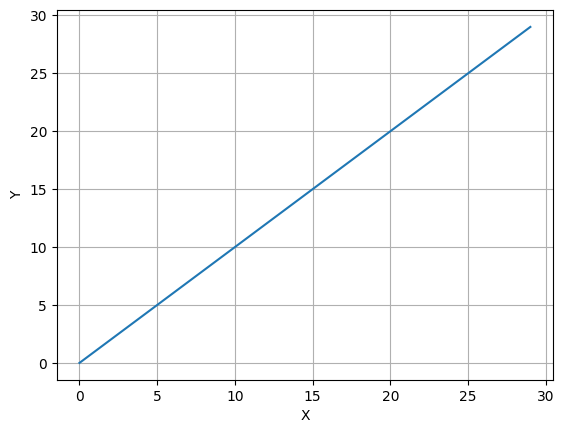

In [ ]:
x = np.arange(30)
y = x  # Linear Equation

plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

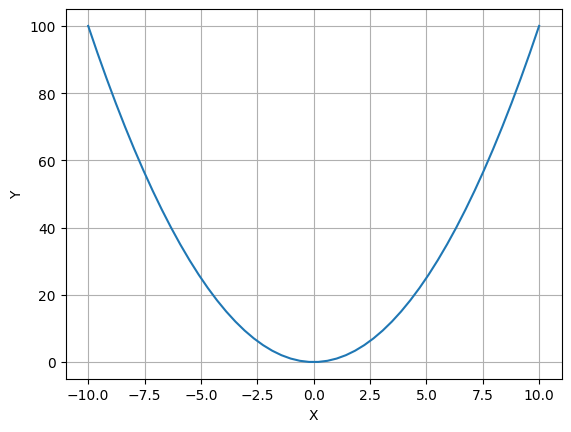

In [ ]:
x = np.linspace(-10,10,50)
y = x**2  # Polynomial Equation

plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

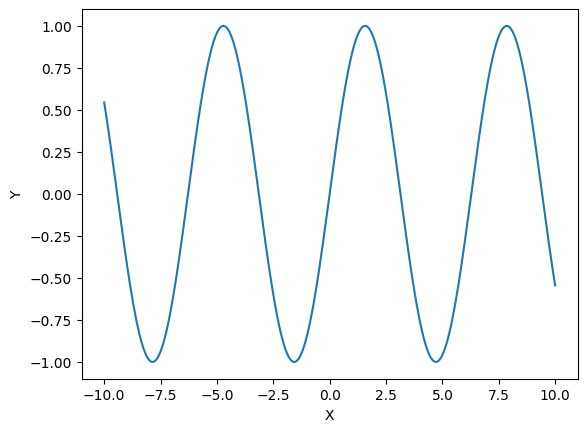

In [ ]:
x = np.linspace(-10,10,500)
y = np.sin(x)

plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()